# Primerjava romanov z Geminijem

## Namestitev programskih knjižnic

In [1]:
# prompt: Namesti Pythonove module za analizo besedil (npr. nltk, spacy) in pandas!

!pip install nltk spacy pandas

## Priklic knjižnic v pomnilnik

In [2]:
import nltk
import spacy
import pandas as pd

nltk.download('punkt') # Download necessary NLTK data
# Download a spacy model (en_core_web_sm is a smaller, faster model)
!python -m spacy download en_core_web_sm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 88.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
# prompt: Besedila bodo v nemščini. Zato naloži modele za nemščino!

!python -m spacy download de_core_news_sm


  Using cached https://github.com/explosion/spacy-models/releases/download/de_core_news_sm-3.7.0/de_core_news_sm-3.7.0-py3-none-any.whl (14.6 MB)
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [1]:
import spacy
nlp = spacy.load("de_core_news_sm")


## Preberi datoteke

In [2]:
# prompt: Preberi datoteki z dveh naslovov github (https://raw.githubusercontent.com/tpetric7/raj2022-book/refs/heads/master/data/books/tom.txt in https://raw.githubusercontent.com/tpetric7/raj2022-book/refs/heads/master/data/books/prozess.txt) in shrani ju v podatkovnem nizu (pandas dataframe) z imenom "df", ki naj ima stolpec "text" in "doc_id".

import pandas as pd
import requests

def get_text_from_github(url):
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception for bad status codes
    return response.text

tom_url = "https://raw.githubusercontent.com/tpetric7/raj2022-book/refs/heads/master/data/books/tom.txt"
prozess_url = "https://raw.githubusercontent.com/tpetric7/raj2022-book/refs/heads/master/data/books/prozess.txt"

tom_text = get_text_from_github(tom_url)
prozess_text = get_text_from_github(prozess_url)

data = {'text': [tom_text, prozess_text], 'doc_id': ['tom.txt', 'prozess.txt']}
df = pd.DataFrame(data)


## Razdeli besedilo na povedi

In [3]:
# prompt: Razdeli besedili na povedi, tako da bom lahko v nadaljevanju izračunal povprečno dolžino povedi in standardni odklon obeh besedil. Potem bi narisal tudi diagram, ki prikazuje povprečji in standardna odklona dolžine povedi.

def split_into_sentences(text):
    doc = nlp(text)
    return [sent.text for sent in doc.sents]

df['sentences'] = df['text'].apply(split_into_sentences)


In [4]:
# prompt: Izpiši pet vrstic podatkovnega niza!

import pandas as pd

# Assuming df is defined as in the previous code
# Display the first 5 rows of the DataFrame
print(df.head())


                                                text       doc_id  \
0  Tom Sawyer by Mark Twain Aligned by : András F...      tom.txt   
1  Der Prozess by Franz Kafka Aligned by : biling...  prozess.txt   

                                           sentences  
0  [Tom Sawyer by Mark Twain Aligned by : András ...  
1  [Der Prozess by Franz Kafka Aligned by : bilin...  


In [7]:
# prompt: Izpiši pet povedi!

# Assuming df is defined as in the previous code
# Display the first 5 sentences of the first document
first_doc_sentences = df['sentences'][0]
for i in range(min(5, len(first_doc_sentences))):  # Print up to 5 sentences, or fewer if the document has less
  print(first_doc_sentences[i])


Tom Sawyer by Mark Twain Aligned by : András Farkas ( autoalignment )   
Source : Project Gutenberg      
Die Abenteuer Tom Sawyers      Mark Twain      Vorwort des Autors .   
Die meisten der hier erzählten Abenteuer haben sich tatsächlich zugetragen .       
Das eine oder das andere habe ich selbst erlebt , die anderen meine Schulkameraden .   


## Povprečna dolžina povedi

Povprečna dolžina povedi: (a) povprečno število znakov na poved ali (b) povprečno število besed na poved.

(a) Povprečno število znakov na poved

In [8]:
# prompt: Izračunaj povprečno dolžino povedi in standardni oklon za obe besedili !

import numpy as np

def calculate_sentence_stats(sentences):
  sentence_lengths = [len(sentence) for sentence in sentences]
  average_length = np.mean(sentence_lengths)
  std_dev = np.std(sentence_lengths)
  return average_length, std_dev

# Calculate and print statistics for both texts
for i in range(len(df)):
  avg_len, std_dev = calculate_sentence_stats(df['sentences'][i])
  print(f"Document: {df['doc_id'][i]}")
  print(f"Average sentence length: {avg_len:.2f}")
  print(f"Standard deviation of sentence length: {std_dev:.2f}")
  print("-" * 20)


Document: tom.txt
Average sentence length: 101.51
Standard deviation of sentence length: 72.99
--------------------
Document: prozess.txt
Average sentence length: 121.45
Standard deviation of sentence length: 91.85
--------------------


(a) Povprečno število znakov na poved

In [ ]:
def calculate_sentence_stats(sentences):
    sentence_lengths = [len(nlp(sentence)) for sentence in sentences]  # counts tokens
    average_length = np.mean(sentence_lengths)
    std_dev = np.std(sentence_lengths)
    return average_length, std_dev

# Calculate and print statistics for both texts
for i in range(len(df)):
  avg_len, std_dev = calculate_sentence_stats(df['sentences'][i])
  print(f"Document: {df['doc_id'][i]}")
  print(f"Average sentence length: {avg_len:.2f}")
  print(f"Standard deviation of sentence length: {std_dev:.2f}")
  print("-" * 20)


### t-Test

In [9]:
# prompt: Ali je razlika v dolžini povedi statistično značilna? Izračunaj t-Test in izpiši, ali je ali ni statistično značilna!

from scipy import stats

# Assuming df and calculate_sentence_stats are defined as in the previous code

# Extract sentence lengths for both documents
tom_sentence_lengths = [len(sentence) for sentence in df['sentences'][0]]
prozess_sentence_lengths = [len(sentence) for sentence in df['sentences'][1]]

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(tom_sentence_lengths, prozess_sentence_lengths)

# Print the results
print(f"t-statistic: {t_statistic:.2f}")
print(f"p-value: {p_value:.3f}")

# Determine statistical significance
alpha = 0.05  # Significance level
if p_value < alpha:
    print("The difference in sentence lengths is statistically significant.")
else:
    print("The difference in sentence lengths is not statistically significant.")


t-statistic: -11.13
p-value: 0.000
The difference in sentence lengths is statistically significant.


In [10]:
# prompt: Katero besedilo ima večjo povprečno dolžino?

import nltk
import spacy
import pandas as pd
import requests
import numpy as np
from scipy import stats

# ... (rest of your existing code)

# Calculate and print statistics for both texts
# ... (your existing code to calculate statistics)


# Find which text has longer average sentence length
tom_avg_len, _ = calculate_sentence_stats(df['sentences'][0])
prozess_avg_len, _ = calculate_sentence_stats(df['sentences'][1])

if tom_avg_len > prozess_avg_len:
    print(f"The text 'tom.txt' has a longer average sentence length ({tom_avg_len:.2f}) than 'prozess.txt' ({prozess_avg_len:.2f}).")
elif prozess_avg_len > tom_avg_len:
    print(f"The text 'prozess.txt' has a longer average sentence length ({prozess_avg_len:.2f}) than 'tom.txt' ({tom_avg_len:.2f}).")
else:
    print(f"Both texts have the same average sentence length ({tom_avg_len:.2f}).")


The text 'prozess.txt' has a longer average sentence length (121.45) than 'tom.txt' (101.51).


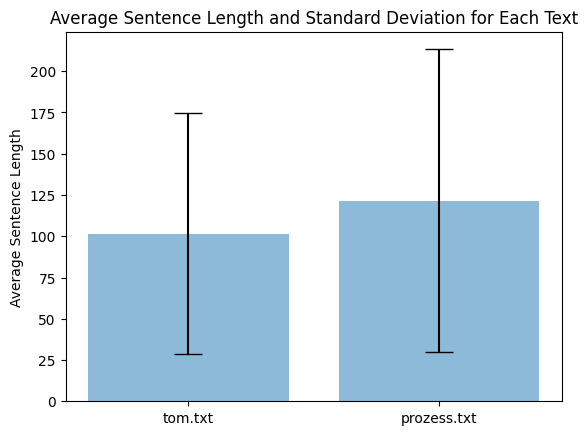

In [11]:
# prompt: Nariši diagram, ki prikazuje povprečno dolžino povedi in standardni odklon v vsakem besedilu!

import numpy as np
import matplotlib.pyplot as plt

# Assuming df and calculate_sentence_stats are defined as in the previous code

# Data for the plot
document_names = df['doc_id']
average_lengths = []
standard_deviations = []

for i in range(len(df)):
    avg_len, std_dev = calculate_sentence_stats(df['sentences'][i])
    average_lengths.append(avg_len)
    standard_deviations.append(std_dev)

# Create the bar plot
x_pos = np.arange(len(document_names))
plt.bar(x_pos, average_lengths, yerr=standard_deviations, align='center', alpha=0.5, ecolor='black', capsize=10)
plt.xticks(x_pos, document_names)
plt.ylabel('Average Sentence Length')
plt.title('Average Sentence Length and Standard Deviation for Each Text')
plt.show()


## Število besed

In [12]:
# prompt: Razdeli povedi na besede (tokens)! V nadaljevanju želim odstraniti nemške funkcijske besede (German stopwords) in prikazovati najpogostejše besede.

import nltk
import spacy
import pandas as pd
from collections import Counter

# ... (your existing code)

# ## Tokenizacija in odstranjevanje stop besed

def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.text for token in doc if not token.is_stop and token.is_alpha]  # Remove stop words and non-alphabetic tokens
    return tokens


# Apply preprocessing to sentences
df['tokens'] = df['sentences'].apply(lambda sentences: [preprocess_text(sentence) for sentence in sentences])


# Function to get most common words
def get_most_common_words(tokens, n=10):
    all_tokens = [token for sublist in tokens for token in sublist]
    word_counts = Counter(all_tokens)
    return word_counts.most_common(n)

# Get and display most frequent words for each document
for i in range(len(df)):
    most_common = get_most_common_words(df['tokens'][i])
    print(f"\nDocument: {df['doc_id'][i]}")
    print("Najpogostejše besede:")
    for word, count in most_common:
        print(f"{word}: {count}")



Document: tom.txt
Najpogostejše besede:
Tom: 740
Huck: 237
Joe: 124
Becky: 101
mal: 99
Tante: 94
Jungen: 92
begann: 86
sehen: 83
sagen: 81

Document: prozess.txt
Najpogostejše besede:
fragte: 181
Tür: 178
Hand: 133
Advokaten: 125
Mann: 122
Maler: 118
Frau: 114
Advokat: 114
Prozeß: 113
Fräulein: 112


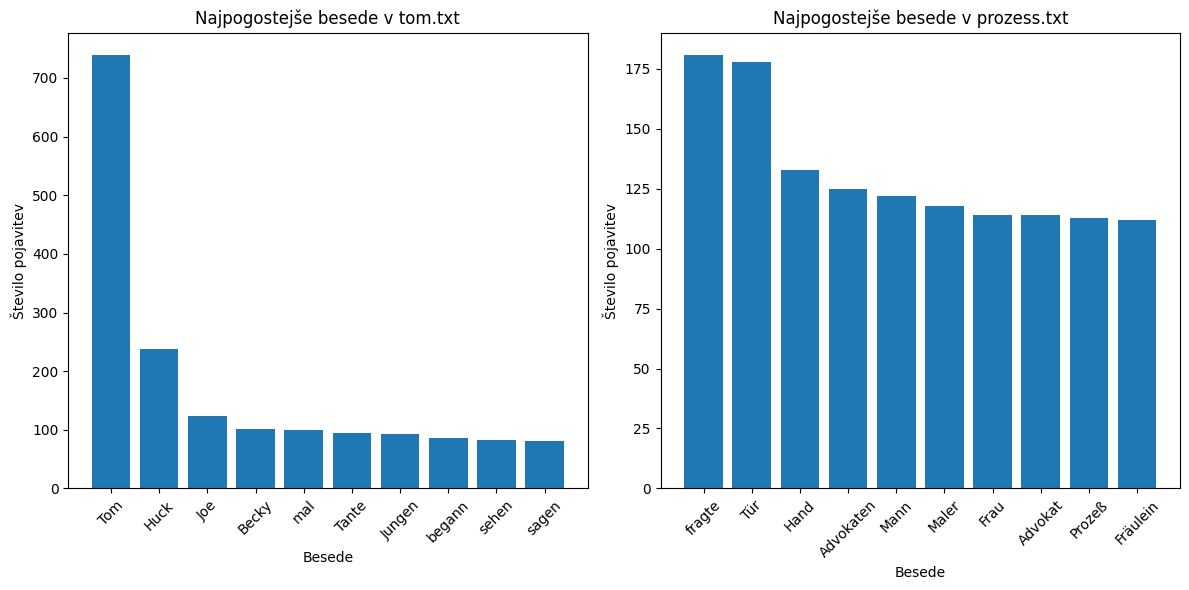

In [14]:
# prompt: Nariši diagrama, ki prikazuje po deset najpogostejših besed iz enega in drugega besedil!

import matplotlib.pyplot as plt

# ... (your existing code)

# Function to get most common words (same as before)
def get_most_common_words(tokens, n=10):
    all_tokens = [token for sublist in tokens for token in sublist]
    word_counts = Counter(all_tokens)
    return word_counts.most_common(n)

# Get most frequent words for each document
most_common_tom = get_most_common_words(df['tokens'][0])
most_common_prozess = get_most_common_words(df['tokens'][1])

# Prepare data for plotting
words_tom, counts_tom = zip(*most_common_tom)
words_prozess, counts_prozess = zip(*most_common_prozess)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot for tom.txt
axes[0].bar(words_tom, counts_tom)
axes[0].set_title('Najpogostejše besede v tom.txt')
axes[0].set_xlabel('Besede')
axes[0].set_ylabel('Število pojavitev')
axes[0].tick_params(axis='x', rotation=45)

# Plot for prozess.txt
axes[1].bar(words_prozess, counts_prozess)
axes[1].set_title('Najpogostejše besede v prozess.txt')
axes[1].set_xlabel('Besede')
axes[1].set_ylabel('Število pojavitev')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout() # Adjust layout to prevent overlapping labels
plt.show()


## Besedne zveze

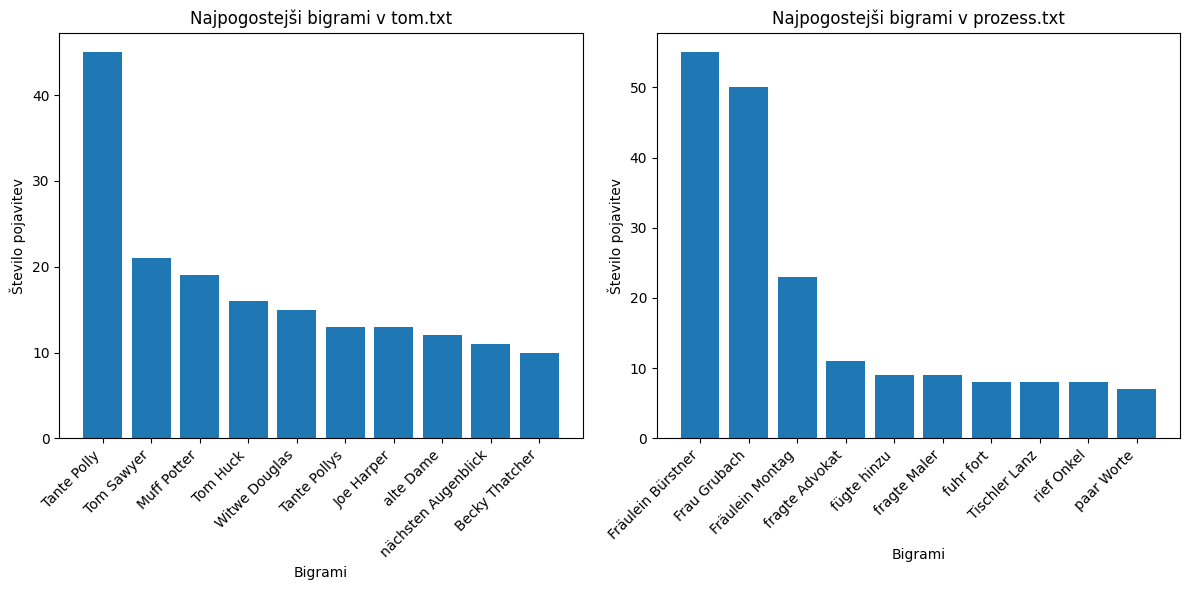

In [16]:
# prompt: Razdeli povedi na dvočlenske besedne zveze (bigrame) v vsakem besedilu, preštej jih in prikaži po 10 najpogostejših za vsako besedilo posebej v obliki dveh diagramov!

import nltk
import spacy
import pandas as pd
import requests
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from collections import Counter

# ... (your existing code)

def get_bigrams(tokens):
    return list(nltk.bigrams(tokens))

df['bigrams'] = df['tokens'].apply(lambda sentences: [get_bigrams(sentence) for sentence in sentences])

def get_most_common_bigrams(bigrams, n=10):
    all_bigrams = [bigram for sublist in bigrams for bigram in sublist]
    bigram_counts = Counter(all_bigrams)
    return bigram_counts.most_common(n)

# Get most frequent bigrams for each document
most_common_bigrams_tom = get_most_common_bigrams(df['bigrams'][0])
most_common_bigrams_prozess = get_most_common_bigrams(df['bigrams'][1])


# Prepare data for plotting
bigrams_tom, counts_tom = zip(*most_common_bigrams_tom)
bigrams_prozess, counts_prozess = zip(*most_common_bigrams_prozess)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for tom.txt
axes[0].bar(range(len(bigrams_tom)), counts_tom)
axes[0].set_xticks(range(len(bigrams_tom)))
axes[0].set_xticklabels([f"{w1} {w2}" for w1, w2 in bigrams_tom], rotation=45, ha='right') # Setting labels
axes[0].set_title('Najpogostejši bigrami v tom.txt')
axes[0].set_xlabel('Bigrami')
axes[0].set_ylabel('Število pojavitev')


# Plot for prozess.txt
axes[1].bar(range(len(bigrams_prozess)), counts_prozess)
axes[1].set_xticks(range(len(bigrams_prozess)))
axes[1].set_xticklabels([f"{w1} {w2}" for w1, w2 in bigrams_prozess], rotation=45, ha='right') # Setting labels
axes[1].set_title('Najpogostejši bigrami v prozess.txt')
axes[1].set_xlabel('Bigrami')
axes[1].set_ylabel('Število pojavitev')

plt.tight_layout()
plt.show()


## Lematizacija

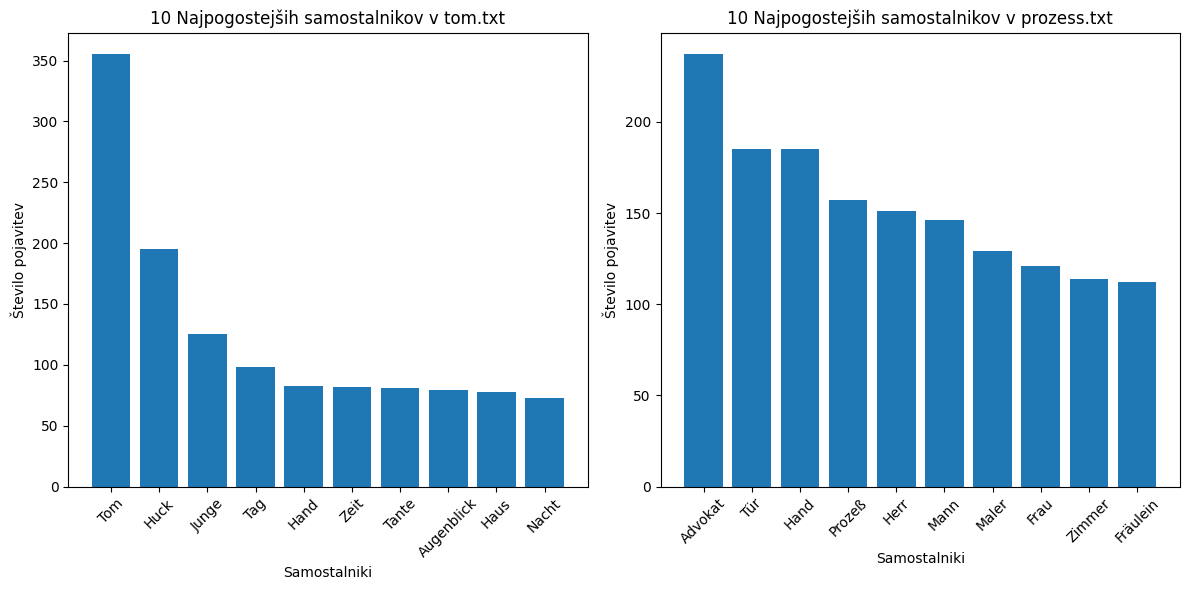

In [17]:
# prompt: Dodeli besedne oblike besednim vrstam in lematiziraj besedne oblike, ki si jih identificiral v povedih obeh besedil! Potem pa nariši diagram 10 najpogostejših samostalnikov (noun) v vsakem besedilu!

import nltk
import spacy
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# ... (Your existing code)

# Lemmatization and POS tagging
def lemmatize_and_pos_tag(sentences):
    lemmas_pos = []
    for sentence in sentences:
        doc = nlp(sentence)
        lemmas_pos.append([(token.lemma_, token.pos_) for token in doc])
    return lemmas_pos

df['lemmas_pos'] = df['sentences'].apply(lemmatize_and_pos_tag)

# Function to get most common nouns
def get_most_common_nouns(lemmas_pos, n=10):
    all_nouns = [lemma for sentence in lemmas_pos for lemma, pos in sentence if pos == "NOUN"]
    noun_counts = Counter(all_nouns)
    return noun_counts.most_common(n)

# Get most frequent nouns for each document
most_common_nouns_tom = get_most_common_nouns(df['lemmas_pos'][0])
most_common_nouns_prozess = get_most_common_nouns(df['lemmas_pos'][1])

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for tom.txt
nouns_tom, counts_tom = zip(*most_common_nouns_tom)
axes[0].bar(nouns_tom, counts_tom)
axes[0].set_title('10 Najpogostejših samostalnikov v tom.txt')
axes[0].set_xlabel('Samostalniki')
axes[0].set_ylabel('Število pojavitev')
axes[0].tick_params(axis='x', rotation=45)

# Plot for prozess.txt
nouns_prozess, counts_prozess = zip(*most_common_nouns_prozess)
axes[1].bar(nouns_prozess, counts_prozess)
axes[1].set_title('10 Najpogostejših samostalnikov v prozess.txt')
axes[1].set_xlabel('Samostalniki')
axes[1].set_ylabel('Število pojavitev')
axes[1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()


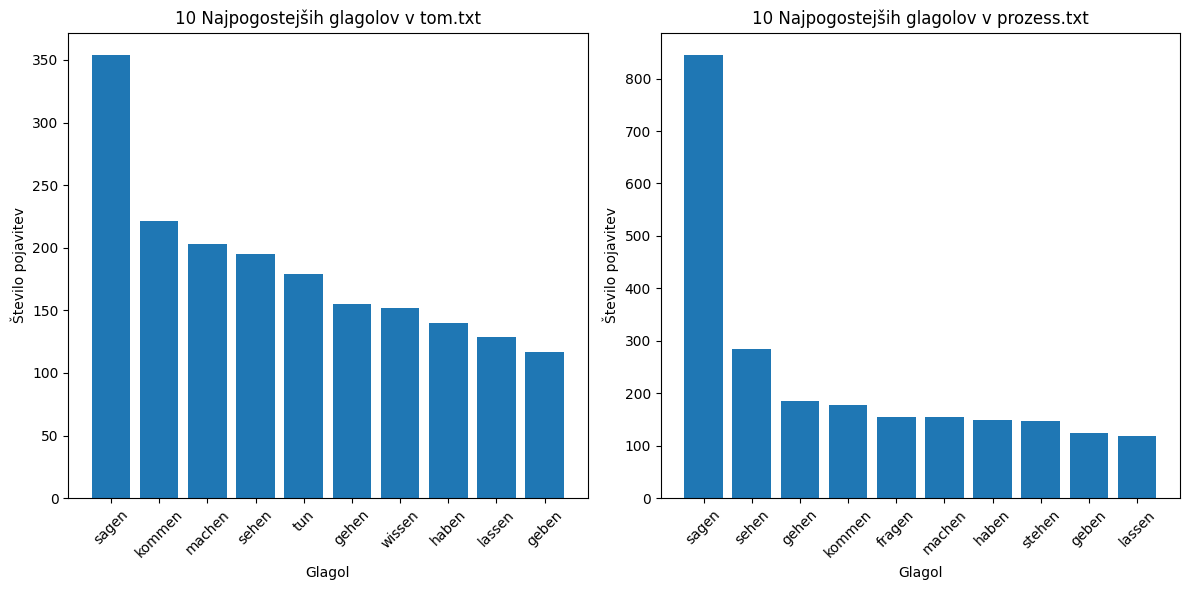

In [18]:
# prompt: Nariši diagram 10 najpogostejših glagolov v vsakem besedilu!

import matplotlib.pyplot as plt
from collections import Counter

def get_most_common_verbs(lemmas_pos, n=10):
    all_verbs = [lemma for sentence in lemmas_pos for lemma, pos in sentence if pos == "VERB"]
    verb_counts = Counter(all_verbs)
    return verb_counts.most_common(n)

# Get most frequent verbs for each document
most_common_verbs_tom = get_most_common_verbs(df['lemmas_pos'][0])
most_common_verbs_prozess = get_most_common_verbs(df['lemmas_pos'][1])

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for tom.txt
verbs_tom, counts_tom = zip(*most_common_verbs_tom)
axes[0].bar(verbs_tom, counts_tom)
axes[0].set_title('10 Najpogostejših glagolov v tom.txt')
axes[0].set_xlabel('Glagol')
axes[0].set_ylabel('Število pojavitev')
axes[0].tick_params(axis='x', rotation=45)

# Plot for prozess.txt
verbs_prozess, counts_prozess = zip(*most_common_verbs_prozess)
axes[1].bar(verbs_prozess, counts_prozess)
axes[1].set_title('10 Najpogostejših glagolov v prozess.txt')
axes[1].set_xlabel('Glagol')
axes[1].set_ylabel('Število pojavitev')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


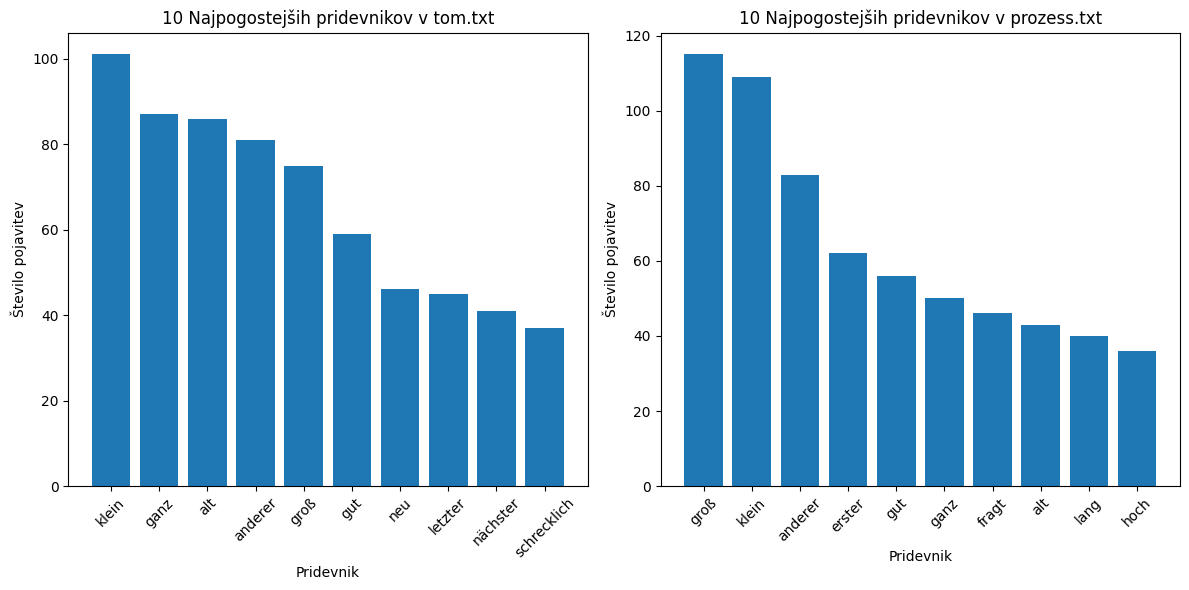

In [19]:
# prompt: Nariši diagram 10 najpogostejših pridevnikov v vsakem besedilu!

import matplotlib.pyplot as plt
from collections import Counter

def get_most_common_adjectives(lemmas_pos, n=10):
    all_adjectives = [lemma for sentence in lemmas_pos for lemma, pos in sentence if pos == "ADJ"]
    adjective_counts = Counter(all_adjectives)
    return adjective_counts.most_common(n)

# Get most frequent adjectives for each document
most_common_adjectives_tom = get_most_common_adjectives(df['lemmas_pos'][0])
most_common_adjectives_prozess = get_most_common_adjectives(df['lemmas_pos'][1])

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for tom.txt
adjectives_tom, counts_tom = zip(*most_common_adjectives_tom)
axes[0].bar(adjectives_tom, counts_tom)
axes[0].set_title('10 Najpogostejših pridevnikov v tom.txt')
axes[0].set_xlabel('Pridevnik')
axes[0].set_ylabel('Število pojavitev')
axes[0].tick_params(axis='x', rotation=45)

# Plot for prozess.txt
adjectives_prozess, counts_prozess = zip(*most_common_adjectives_prozess)
axes[1].bar(adjectives_prozess, counts_prozess)
axes[1].set_title('10 Najpogostejših pridevnikov v prozess.txt')
axes[1].set_xlabel('Pridevnik')
axes[1].set_ylabel('Število pojavitev')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


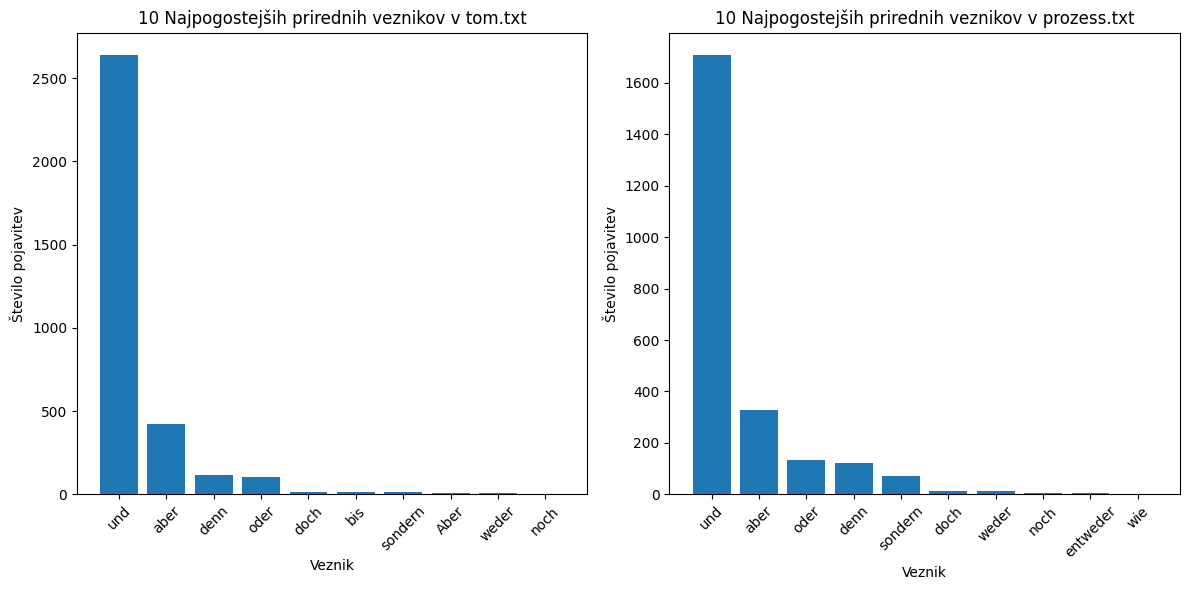

In [21]:
# prompt: Nariši diagram 10 najpogostejših prirednih veznikov v vsakem besedilu!

import spacy
import matplotlib.pyplot as plt
from collections import Counter

# ... (your existing code)

def get_most_common_subordinating_conjunctions(lemmas_pos, n=10):
    all_conjunctions = [lemma for sentence in lemmas_pos for lemma, pos in sentence if pos == "CCONJ"]
    conjunction_counts = Counter(all_conjunctions)
    return conjunction_counts.most_common(n)

# Get most frequent subordinating conjunctions for each document
most_common_conjunctions_tom = get_most_common_subordinating_conjunctions(df['lemmas_pos'][0])
most_common_conjunctions_prozess = get_most_common_subordinating_conjunctions(df['lemmas_pos'][1])

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for tom.txt
conjunctions_tom, counts_tom = zip(*most_common_conjunctions_tom)
axes[0].bar(conjunctions_tom, counts_tom)
axes[0].set_title('10 Najpogostejših prirednih veznikov v tom.txt')
axes[0].set_xlabel('Veznik')
axes[0].set_ylabel('Število pojavitev')
axes[0].tick_params(axis='x', rotation=45)

# Plot for prozess.txt
conjunctions_prozess, counts_prozess = zip(*most_common_conjunctions_prozess)
axes[1].bar(conjunctions_prozess, counts_prozess)
axes[1].set_title('10 Najpogostejših prirednih veznikov v prozess.txt')
axes[1].set_xlabel('Veznik')
axes[1].set_ylabel('Število pojavitev')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


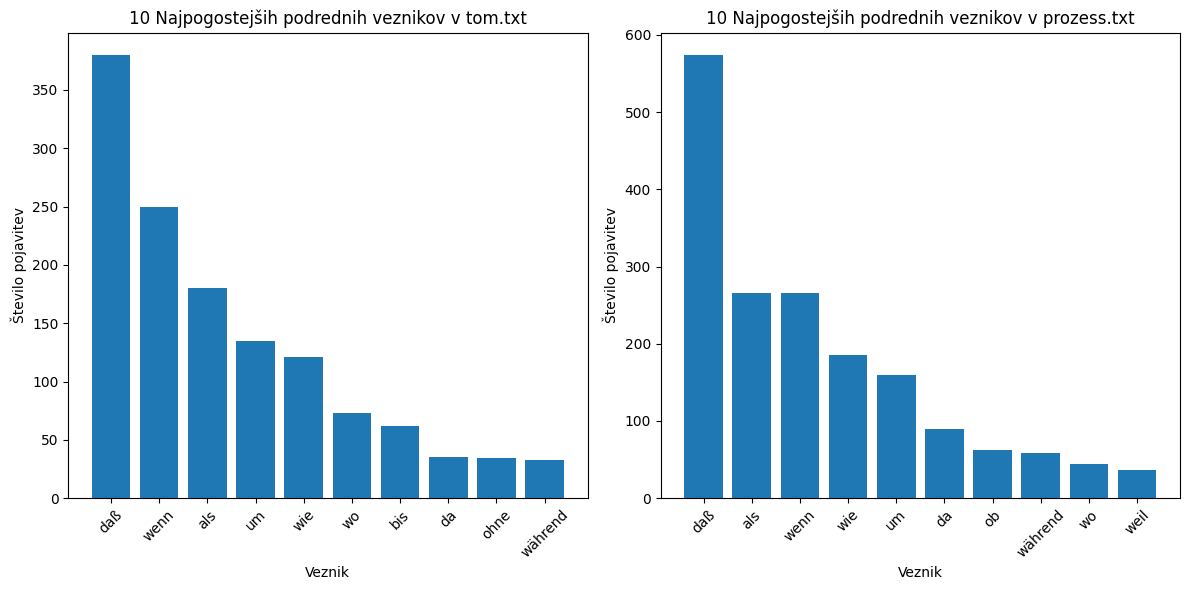

In [22]:
# prompt: Nariši diagram 10 najpogostejših podrednih veznikov (SCONJ) v vsakem besedilu!

import matplotlib.pyplot as plt
from collections import Counter

def get_most_common_subordinating_conjunctions(lemmas_pos, n=10):
    all_conjunctions = [lemma for sentence in lemmas_pos for lemma, pos in sentence if pos == "SCONJ"]
    conjunction_counts = Counter(all_conjunctions)
    return conjunction_counts.most_common(n)

# Get most frequent subordinating conjunctions for each document
most_common_conjunctions_tom = get_most_common_subordinating_conjunctions(df['lemmas_pos'][0])
most_common_conjunctions_prozess = get_most_common_subordinating_conjunctions(df['lemmas_pos'][1])

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for tom.txt
conjunctions_tom, counts_tom = zip(*most_common_conjunctions_tom)
axes[0].bar(conjunctions_tom, counts_tom)
axes[0].set_title('10 Najpogostejših podrednih veznikov v tom.txt')
axes[0].set_xlabel('Veznik')
axes[0].set_ylabel('Število pojavitev')
axes[0].tick_params(axis='x', rotation=45)

# Plot for prozess.txt
conjunctions_prozess, counts_prozess = zip(*most_common_conjunctions_prozess)
axes[1].bar(conjunctions_prozess, counts_prozess)
axes[1].set_title('10 Najpogostejših podrednih veznikov v prozess.txt')
axes[1].set_xlabel('Veznik')
axes[1].set_ylabel('Število pojavitev')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
